In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

Pontus Hultkrantz

# [May 2022 : Robot Updated Swimming Trials](https://www.janestreet.com/puzzles/robot-updated-swimming-trials-index/)

<p>Back in October, we were tasked with the puzzle of finding the
smallest number of robots we could invite to a Robot Swimming Trial in
order to change the optimal strategy of participants away from
discrete. <a href="https://www.janestreet.com/puzzles/robot-swimming-trials-index/">Click
here</a>
to see the original puzzle explanation and example; in the next
paragraph we will go over a quick refresher on the setup.</p>

<p>The tournament directors choose a positive integer <em>N</em>, and then 3<em>N</em>
robots are invited to compete in the trials, which are <em>N</em> races between
all 3<em>N</em> robots. The robots commit to using a schedule of their
identical fuel amounts to the <em>N</em> races, and on a given race whatever
robot burns the most fuel wins (ties for most fuel spent on a given
race are split uniformly randomly among the tying robots). All robots
swim in all races according to their schedules, and then <em>N</em> distinct
winners are determined, one from each race, by successively selecting
the robot from the remaining races that spent the most fuel and
finished ahead of all other robots that haven’t yet won a race. Robots
all compete (i.e. choose their fuel allotment distributions to
maximize the probability) to be selected for the finals by this
method. The discrete strategy is the one in which a robot chooses a
race uniformly randomly and assigns all of its fuel to that race, and
zero fuel to the other races.</p>

<p>We found (spoiler alert!) that inviting 24 robots to compete in 8
trial races (i.e. <em>N</em>=8) created a tournament in which the discrete
strategy was no longer optimal. The tournament organizers adopted this
tournament size, and viewers were rewarded with a richer set of
strategies and more diverse race results<sup id="fnref:1"><a href="#fn:1" class="footnote">1</a></sup>. As expected, the
competitors switched from everyone always using the discrete strategy
to more subtle and continuous allotments of fuel. The metagame evolved
and eventually settled into a <a href="https://en.wikipedia.org/wiki/Nash_equilibrium">Nash
equilibrium</a> in which
a given competitor chooses the discrete strategy with a certain
probability <em>p</em>, and otherwise elects for an allotment that
distributes nonzero fuel to at least two races.</p>

<p><strong>Find <em>p</em></strong>, the probability a robot using the Nash equilibrium strategy
when competing at a Robot Updated Swimming Trial with <em>N</em>=8 devotes
all of its fuel to a single race, <strong>to 6 significant digits</strong>.</p>

<div class="footnotes">
  <ol>
    <li id="fn:1">
      <p>Also, many fewer extremely slow races in which all robots devoted zero fuel, and whichever robot’s random motion took it across the finish line first was declared the winner. <a href="#fnref:1" class="reversefootnote">&#8617;</a></p>
    </li>
  </ol>
</div>

## Methodology
Solution is based on the previous problem solved in **2021-10-robot-swimming-trials.ipynb**

Let $n$ be the number of robots and $k$ be the number of races. We define $m:=n-1$ as the number of opponents. Since all robots play the same mixed strategy, we have $P(W)=\frac{k}{n}$. Since the mixed strategy is at equilibrium, any one robot will be indifferent to picking either strategy (or else they would always pick the better one, and we would not be in equilibrium).

Let $\mathcal{S}_p$ and $\mathcal{S}_{1-p}$ be the sets of robots playing the discrete and the alternative strategy respectively. We denote the cardinality $|\mathcal{S}|$ of each set as the (random) number of robots in either strategy. From now on, we will consider us playing as one of the robots, assuming that all other robots are playing the equilibrium strategy and that our probability of winning is then invariant to the strategy we choose.

- $X_p \sim Binom(m,p)$: number of opponents chosing $\mathcal{S}_p$. Consequensely, $X_{1-p}=m-X_p$ opponents in $\mathcal{S}_{1-p}$. If we play $\mathcal{S}_p$, we have $|\mathcal{S}_p|= X_{p}+1$ and $|\mathcal{S}_{1-p}|= X_{1-p}$, whereas if we choose to play $\mathcal{S}_p$ we have $|\mathcal{S}_p|= X_{p}$ and $|\mathcal{S}_{1-p}|= X_{1-p}+1$.
- $A_p$ and $E_p:=k-A_p$: the number of races with non-zero fuel and races with zero-allocated fuel by robots in $\mathcal{S}_p$. Due to unit fuel, $A_p$ races are guaranteed to be won by the group, and $E_p$ races are available to be won by robots in $\mathcal{S}_{1-p}$.
- $2\leq \delta \leq k$: the number of races that robots in $\mathcal{S}_p$ allocate non-zero fuel to.
- $A_{1-p}$: how many of the $E_p$ races are non-zero allocated to by robots in $\mathcal{S}_{1-p}$. When $\delta=k$ we have $A_{1-p}=E_p$ almost surely.
- $E_{1-p}:=k-A_{1-p}$: how many of the $E_p$ races are not allocated to by robots in $\mathcal{S}_{1-p}$. That is, it is the number of zero-allocated races by the end of the game, and thus they will be tied by the remaining non-winners and allocated uniformly. When $\delta=k$ we have $E_{1-p}=0$ almost surely.
- $T_p$: the number of zero-allocated races out of $E_{1-p}$ that gets awarded to robots in $\mathcal{S}_p$. Also, $T_{1-p} = E_{1-p} - T_p$. When $\delta=k$ we have $T_{1-p} = T_p = 0$ almost surely.
- $Q_p$ and $Q_{1-p}$: the number of finalists from respective strategy. $Q_{1-p} + Q_p = k$.

We aim to find $0<p<1$ (strict since we have a mixed strategy) that satisfies

\begin{align}
    \frac{k}{n} = P_{\mathcal{S}_p}(W) = P_{\mathcal{S}_{1-p}}(W),
\end{align}
where $P_{\mathcal{s}}$ denotes our winning probability when we participate in strategy $s\in \{\mathcal{S}_p,\mathcal{S}_{1-p}\}$.

### Distribution for $A_p$ and $E_p$ 
The distribution for $A_p$ and $E_p$ are known from the previous robot-swimming-trial. The distribution for $A_p$ is the same as considering the number of non-empty urns after dropping $|\mathcal{S}_p|$ balls into $k$ urns. From the previous robot-swimming problem we know the pmfs as $f_{A_p}(a;|\mathcal{S}_p|,k)$ and $f_{E_p}(i;|\mathcal{S}_p|,k)=f_{A_p}(k-i;|\mathcal{S}_p|,k)$.

\begin{align}
    f_A(a; n,k) = 
    \begin{cases}
        1, & \text{if } n=a=0\\
        0, & \text{if } a=0 \text{ or } n<a\\
        \left(1-\frac{a-1}{k}\right)f(a-1;n-1, k) + \frac{a}{k}f(a;n-1,k), & \text{otherwise}\\
    \end{cases}
\end{align}
using recurrence relation or as
\begin{align}
    f_E(i) = \sum_{\ell=i}^k (-1)^{\ell-i} {\ell \choose i}a_\ell, \quad a_\ell = {k \choose \ell} {{k-\ell} \choose k}^m
\end{align}
using the inclusion-exclusion principle.

### Distribution for $A_{1-p}$ and $E_{1-p}$ 
The distribution for $A_{1-p}$ can be found by an equivalent problem: **Given $E_p\leq k$ tickets in $k$ boxes, with max one ticker per box, $|\mathcal{S}_{1-p}|$ players each open up to $\delta$ boxes until a ticket is collected,  what is density for the total number of collected tickets?**

Let $(a,s)$ be the state with $a$ tickets collected after $s$ player turns, then at each state we have two transitions
\begin{align}
    q:= P[(a,s)\to (a,s+1)] &= \frac{{k - (E_p-a)}\choose \delta}{k \choose \delta} \\
    P[(a,s)\to (a+1,s+1)] &= 1-q
\end{align}
which means that the state density is given by
\begin{align}
    f_{A_{1-p}}(a;s) &= 
    \begin{cases}
        1 & \text{if } a=s=0, \\
        0 & \text{if }a<0, \text{ or } a>\min(k-A_p,s), \\
        \gamma(a)f_{A_{1-p}}(a;s-1) + \left\{1 - \gamma(a-1)\right\}f_{A_{1-p}}(a-1;s-1) & \text{otherwise}
    \end{cases} \\
    \gamma(a) &= {A_p+a \choose \delta}/{k \choose \delta}
\end{align}


### When $\delta = k$ (cooperation)

If we assume cooperation, all robots will simultaneously pick the $\delta$ that maximizes the number of finalists for the $\mathcal{S}_{1-p}$ group, hence maximizing the probability of each individual from the group winning. The only way to accomplish this is to allocate fuel to as many of the $E$ races as possible, hence $\delta=k$. Remember that any of the $E_p$ races not claimed by $\mathcal{S}_{1-p}$ will be divided uniformly to robots from both groups. Hence $\mathcal{S}_{p}$ group maximizes the number of their own finalists by minimizing the number of finalists from $\mathcal{S}_{p}$. As this yields the highest probability of winning in the group, this will attract the most robots to choose the strategy. That is $\delta=k$ yields the highest value of $p$.

Since $\delta = k$, all races will have non-zero allocations by the end of the game. 
The number of qualified finalists is
\begin{align}
    Q_{1-p} &= \min(|\mathcal{S}_{1-p}|, E), \\
    Q_{p} &= A + \max(0, E-|\mathcal{S}_{1-p}|) = k-Q_{1-p}
\end{align}

That is, if $|\mathcal{S}_{1-p}|\geq E$ then $Q_{1-p}=E$ and $Q_{p}=A$. However, if $|\mathcal{S}_{1-p}|<E$ then all robots in $\mathcal{S}_{1-p}$ are qualified, and the remaining $E-|\mathcal{S}_{1-p}|$ zero-fuel races will yield qualified finalists (broken by tie) for $\mathcal{S}_p$ for a total of $k-|\mathcal{S}_{1-p}|$. 
The probability of winning in either strategy group is given by the expected number of qualified robots divided by the number of participants, that is for $\mathcal{S}_{p}$

\begin{align}
    P_{S_p}(W) = \mathbb{E}\left[\frac{Q_{p}}{|\mathcal{S}_p|}\right] = \mathbb{E}\left[\frac{\max\{A, k-n+|\mathcal{S}_p|\}}{|\mathcal{S}_p|}\right],
\end{align}
and if we participate then $|\mathcal{S}_p|=X_p+1$ and $|\mathcal{S}_{1-p}|=n-|\mathcal{S}_p|$ gives our winning probability.

The winning probability of any robot in $\mathcal{S}_{1-p}$ is given by
\begin{align}
    P_{S_{1-p}}(W) = \mathbb{E}\left[\frac{Q_{1-p}}{|\mathcal{S}_{1-p}|}\right] = \mathbb{E}\left[\min\left\{1, \frac{k-A}{n-|\mathcal{S}_p|}\right\} \right],
\end{align}
and if we participate then $|\mathcal{S}_p|=X_p$ and $|\mathcal{S}_{1-p}|=X_{1-p}+1=n-X_p$ gives our winning probability.

#### Method 1: Pr winning if one plays $\mathcal{S}_p$:

Probability of winning at equilibrium is $\frac{k}{n}$ and with $|\mathcal{S}_p|=X_p+1$ we have
\begin{align}
    \frac{k}{n} = P_{S_p}(W) &=  \sum_{x=0}^m P_{S_p}(W|X_p=x)f_X(x;m, p) \\
    &= \sum_{x=0}^m\sum_{a=0}^{k} P_{S_p}(W|X_p=x,A=a)f_A(a;x+1, k)f_X(x;m, p) \\
    &= \sum_{x=0}^{n-1}\sum_{a=0}^{k} \frac{\max(a, k-m+x)}{x+1}f_A(a;x+1, k)f_M(x;m, p).
\end{align}

For mixed strategy we must have $0<p<1$ (else it wouldn't be mixed). The
equality has one valid root at
\begin{align}
    p\approx 0.999560.
\end{align}

#### Method 2: Pr winning if one plays $\mathcal{S}_{1-p}$:

Probability of winning at equilibrium is $\frac{k}{n}$ and with $|\mathcal{S}_p|=X_p$ we have
\begin{align}
    \frac{k}{n} = P_{S_{1-p}}(W) &=  \sum_{x=0}^m P_{S_{1-p}}(W|X_p=x)f_X(x;m, p) \\
    &= \sum_{x=0}^m\sum_{a=0}^{k} P_{S_{1-p}}(W|X_p=x,A=a)f_A(a;x, k)f_X(x;m, p) \\
    &= \sum_{x=0}^m\sum_{a=0}^{k} \min\left(1, \frac{k-a}{n-x}\right) f_A(a;x, k)f_X(x;m, p).
\end{align}

For mixed strategy we must have $0<p<1$ (else it wouldn't be mixed). The
equality has one valid root at
\begin{align}
    p\approx 0.999560.
\end{align}

### General $2\leq \delta \leq k$ (no cooperation)

Assume that all robots in $\mathcal{S}_{1-p}$ allocate to $\delta_{op}$ races, and let $w_{1-p}(\delta_{op},\delta)$ be the our probability of winning by changing to $\delta$. If $\delta_{op}$ is at equilibrium it must hold that $w_{1-p}(\delta_{op},\delta)$ < $w_{1-p}(\delta_{op},\delta_{op})$ for all $\delta\neq\delta_{op}$. That is, we will not gain anything by changing.

In particular, assume that $\delta_{op}=k$, which yields the highest cooperative benefit for the group. While it is clear that the group benefits as a whole by us playing $\delta=\delta_{eq}$, it could be advantageous to reduce it to be more competitive when ties are broken against robots in our group. It is not clear whether this is the case, and it would probably oblige us to consider the kind of strategy allocation used.

Instead, we will calculate the winning probability as a function of $\delta$, assuming it is at equilibrium. For $k>8$ several solution pairs $(p,\delta)$ exist, and we wouldn't know which one is the stable Nash-equilibrium. Luckily, for $k=8$ races and $n=24$ robots, the only unique solution $0<p<1$ exists at $\delta=k$. Hence, if there is a stable unique Nash-equilibrium, then this must be it.

Let $A_{1-p}$ denote the number of races in $\mathcal{S}_{1-p}$ that are won by allocation of non-zero fuel. The remaining $E_{1-p}:=E-A_{1-p}$ zero-allocated races will be uniformly awarded to the remaining $\epsilon_{1-p}=|\mathcal{S}_{1-p}|-A_{1-p}$ robots in $\mathcal{S}_{1-p}$, and $\epsilon_{p}=|\mathcal{S}_{p}|-A_p$ robots in $\mathcal{S}_{p}$. With $T_p$ the number of remaining races awarded to $\mathcal{S}_p$, we have that the number of qualified finalists from the groups are given by

#### Pr winning if one plays $\mathcal{S}_{1-p}$:

\begin{align}
    Q_{p} &= A_p + T_p \\
    Q_{1-p} &= k-Q_{p}
\end{align}
where
\begin{align}
    T_p \sim Binom(E_{1-p}, \tilde{p}), \quad \tilde{p} = \frac{\epsilon_{p}}{\epsilon_{1-p} + \epsilon_{p}} = \frac{|\mathcal{S}_p|-A_p}{n-A_p-A_{1-p}}.
\end{align}

and so 
\begin{align}
    P_{S_{1-p}}(W) = \mathbb{E}\left[\frac{Q_{1-p}}{|\mathcal{S}_{1-p}|}\right] = \mathbb{E}\left[\frac{k-A_p-T_p}{n-|\mathcal{S}_p|}\right],
\end{align}.

Participating in $\mathcal{S}_p$, our probability of winning at equilibrium is $\frac{k}{n}$ and with $|\mathcal{S}_p|=X_p$ we have
\begin{align}
    \frac{k}{n} = P_{S_{1-p}}(W) &=  \sum_{x_p=0}^m P_{S_{1-p}}(W|X_p=x_p)f_X(x;m, p) \\
    &= \sum_{x_p=0}^m\sum_{a_p=0}^{k} P_{S_{1-p}}(W|X_p=x_p,A_p=a_p)f_A(a_p;x_p, k)f_X(x_p;m, p) \\
    &= \sum_{x_p=0}^m\sum_{a_p=0}^{k}\sum_{t_p=0}^{k} P_{S_{1-p}}(W|X_p=x_p,A_p=a_p,T_p=t_p)f_A(a_p;x_p, k)f_X(x_p;m, p)f_{T_p}(t;E_{1-p},\tilde{p}) \\
    &= \sum_{x_p=0}^m\sum_{a_p=0}^{k}\sum_{t_p=0}^{k}\sum_{a_{1-p}=0}^{k} P_{S_{1-p}}(W|X_p=x_p,A_p=a_p,T_p=t_p,A_{1-p}=a_{1-p})f_A(a_p;x_p, k)f_X(x_p;m, p)f_{T_p}(t_p;E_{1-p},\tilde{p})f_{A_{1-p}}(a_{1-p};E_p) \\
    &= \sum_{x_p=0}^m\sum_{a_p=0}^{k}\sum_{t_p=0}^{k}\sum_{a_{1-p}=0}^{k} \frac{k-a_p-t_p}{n-x_p} f_A(a_p;x_p, k)f_X(x_p;m, p)f_{T_p}(t_p;k-a_p-a_{1-p},\tilde{p})f_{A_{1-p}}(a_{1-p};k-a_p)
\end{align}
where densities have support for the following domain
\begin{align}
    &0 \leq x_p \leq m\\
    &0 \leq a_p \leq \min(k,x_p)\\
    &0 \leq a_{1-p} \leq n-x_p\\
    &0 \leq t_p \leq e_{1-p} = e_p - a_{1-p} = k-a_p-a_{1-p},
\end{align}
where $e_{1-p}$ and $e_{p}$ are outcomes of $E_{1-p}$ and $E_p$, respectively.

The following candidate solutions exist

| robots | races | $\delta$ | p |
| --- | --- | --- | --- |
| 24 | 8 | 8 | 0.999560 |
| 27 | 9 | 9 | 0.988450 |
|  |  | 8 | 0.998708 |
| 30 | 10 | 10 | 0.980347 |
|  |  | 9 | 0.987614 |
|  |  | 8 | 0.998021 |


For number of races $k>8$ several solution pairs $(p,\delta)$ exist, and we wouldn't know which one is the stable Nash-equilibrium. Luckily, for $k=8$ races ($n=24$ robots), a unique candidate solution $0<p<1$ exists at $\delta=k=8$. Hence, if there is a stable unique Nash-equilibrium, then this the solution.

In [3]:
import numpy as np
from scipy.optimize import root_scalar
from scipy import stats
from matplotlib import pyplot as plt
from scipy.special import comb as sp_comb
from functools import cache

@cache
def comb(N,k):
    return sp_comb(N, k, exact=True, legacy=False)

def nonempty_urns_pmf_tabul(m, k):
    """ A_p. Drop k balls into m urns, pmf of number of nonempty urns. DP solution. """
    f = np.zeros((m+1, k+1))
    f[0,0] = 1.0
    for u in range(1, k+1):
        for b in range(u, m+1):
            f[b, u] = (1-(u-1)/k) * f[b-1, u-1] + u/k * f[b-1, u]
    return f[m]

def nonempty_urns_pmf_inclexcl(m,k):
    """ A_p. Drop k balls into m urns, pmf of number of empty urns. Incl-excl principle. """
    def pr_empty(i):
        return sum((-1)**(l-i)*comb(l,i)*comb(k,l)*((k-l)/k)**m for l in range(i, k+1))
    pmf_empty = np.array([pr_empty(i) for i in range(k+1)])
    pmf_nonempty = pmf_empty[::-1]
    return pmf_nonempty


def pr_win_play_Sp(n, k, p):
    """ P_{S_p}(W): Pr win if playing S_p. """
    m = n-1
    tot_pr = 0
    for x in range(m+1):
        f_A = nonempty_urns_pmf_tabul(x+1, k)
        f_Xx = stats.binom.pmf(x, m, p)
        for a in range(k+1):
            tot_pr += max(a, k-m+x) / (x+1) * f_A[a] * f_Xx
    return tot_pr

def pr_win_play_S1mp(n, k, p):
    """ P_{S_{1-p}}(W): Pr win if playing S_{1-p}. """
    m = n-1
    tot_pr = 0
    for x in range(m+1):
        f_A = nonempty_urns_pmf_tabul(x+0, k)
        f_Xx = stats.binom.pmf(x, m, p)
        for a in range(k+1):
            tot_pr += min(1, (k-a)/(n-x)) * f_A[a] * f_Xx
    return tot_pr

def root_eq_Sp(p, n, k):
    """ Find unknown p that satisfies P_{S_p}(W)=k/n at equlibrium"""
    return pr_win_play_Sp(n, k, p) - k/n

def root_eq_S1mp(p, n, k):
    """ Find unknown p that satisfies P_{S_{1-p}}(W)=k/n at equlibrium"""
    return pr_win_play_S1mp(n, k, p) - k/n

# ======================
# ===== <delta!=k> =====
# ======================
# Only used when delta!=k (robots in S{1-p} allocate fuel to 2<=delta<=k races)
def tickets_collected_pmf_tabul(n_boxes, n_tickets, n_players, n_trials):
    """ A_{1-p}. n_boxes  with n_tickets boxes having tickets.
    Sequentially, n_players each pick max n_trials boxes until ticket is found.
    Pmf for number of tickets collected.
    Using DP with tabulation.
    """
    def pr_noticket(n_coll):
        n_empty_boxes = n_boxes-(n_tickets-n_coll)
        return comb(n_empty_boxes, n_trials) / comb(n_boxes, n_trials)
    
    f = np.zeros((n_players+1, n_tickets+1))
    f[0,0] = 1.0
    
    for turn in range(1, n_players+1):
        f[turn, 0] = pr_noticket(n_coll=0)*f[turn-1, 0] + 0

    for n_coll in range(1, n_tickets+1):
        for turn in range(n_coll, n_players+1):
            f[turn, n_coll] = pr_noticket(n_coll)*f[turn-1, n_coll] + (1-pr_noticket(n_coll-1))*f[turn-1, n_coll-1]
    return f[-1,:]

def tickets_collected_pmf_rec(n_boxes, n_tickets, n_players, n_trials):
    """ A_{1-p}. Solving boxes with tickets, using  recursion """
    def pr_noticket(coll):
        n_empty_boxes = n_boxes-(n_tickets-coll)
        return comb(n_empty_boxes, n_trials) / comb(n_boxes, n_trials)
    @cache
    def rec(n_coll, n_players):
        if n_coll == n_players == 0:
            return 1.0
        elif n_coll < 0 or n_coll > min(n_players, n_tickets):
            return 0.0
        else:
            return pr_noticket(n_coll) * rec(n_coll, n_players-1) + (1-pr_noticket(n_coll-1))*rec(n_coll-1, n_players-1)
    
    return np.array([rec(collected, n_players) for collected in range(n_tickets+1)])

# Only used when delta!=k (robots in S{1-p} allocate fuel to 2<=delta<=k races)
def pr_win_play_S1mp_delta(n, k, p, delta):
    m = n-1
    tot_pr = 0
    for x_p in range(m+1):
        f_A = nonempty_urns_pmf_tabul(x_p, k)
        f_Xx = stats.binom.pmf(x_p, m, p)
        for a_p in range(min(k, x_p)+1):
            f_A1mp = tickets_collected_pmf_tabul(n_boxes=k, n_tickets=k-a_p, n_players=n-x_p, n_trials=delta)
            for a_1mp in range(n-x_p+1):
                for t_p in range(k-a_p-a_1mp+1):
                    f_Tp = stats.binom.pmf(t_p, k-a_p-a_1mp, (x_p-a_p)/(n-a_p-a_1mp))
                    tot_pr += (k-a_p - t_p)/(n-x_p) * f_A[a_p] * f_Xx * f_A1mp[a_1mp] * f_Tp
    return tot_pr

def root_eq_S1mp_delta(p, n, k, delta):
    """ Find unknown p that satisfies P_{S_{1-p}}(W)=k/n at equlibrium"""
    return pr_win_play_S1mp_delta(n, k, p, delta) - k/n

# ======================
# ===== </delta!=k> ====
# ======================


def unittest():
    def assertion(fun1, fun2, cases):
        for case in cases:
            assert np.allclose(fun1(**case), fun2(**case)), f'Test case {case} failed.'
        
    cases = [
        {'m':24, 'k':8},
        {'m':20, 'k':10},
    ]
    assertion(nonempty_urns_pmf_tabul, nonempty_urns_pmf_inclexcl, cases)
        
    cases = [
        {'n_boxes':10, 'n_tickets':5, 'n_players':20, 'n_trials':10},
        {'n_boxes':10, 'n_tickets':5, 'n_players':10, 'n_trials':2},
    ]
    assertion(tickets_collected_pmf_tabul, tickets_collected_pmf_rec, cases)
    
        
    cases = [
        {'n':24, 'k':8, 'p':0.5},
        {'n':25, 'k':10, 'p':0.5},
    ]
    fun2 = lambda n,k,p: pr_win_play_S1mp_delta(n, k, p, delta=k)
    assertion(pr_win_play_S1mp, fun2, cases)
        
    return True

In [4]:
assert unittest(), "Unit test failed"

_xtol = 1e-13
p_conf = {'domain': (2*_xtol, 1-2*_xtol), 'xtol' : _xtol, 'round':6} # 0<p<1

## Solution when $\delta = k$

Equilibrium probability (0<p<1) p = 0.99956


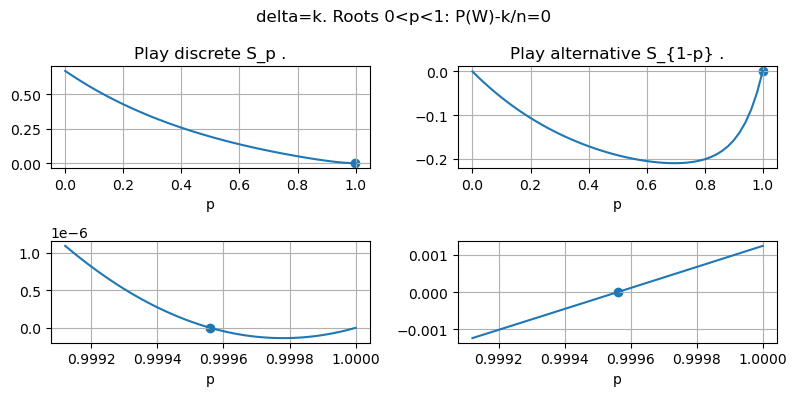

In [5]:
k = 8
n = 3*k

# ============================
# === Find root solution p ===
# ============================

# P(Win) if we play discrete S_p
p_Sp = root_scalar(root_eq_Sp, args=(n,k), bracket=p_conf['domain'], method='brentq', xtol=p_conf['xtol'])

# P(Win) if we play alternative S_{1-p}
p_S1mp = root_scalar(root_eq_S1mp, args=(n,k), bracket=p_conf['domain'], method='brentq', xtol=p_conf['xtol'])

# Should yield the same root.
assert abs(p_Sp.root-p_S1mp.root)<p_conf['xtol'], 'The two methods do not give the same root.'

p_solution = p_Sp.root # ==p_alt.root
print(f"Equilibrium probability (0<p<1) p = {round(p_solution, p_conf['round'])}")

# ======================================
# === Check for other possible roots ===
# ======================================
fig, axs = plt.subplots(2,2, figsize=(8,4))
fig.suptitle('delta=k. Roots 0<p<1: P(W)-k/n=0')
axs[0,0].set_title('Play discrete S_p .')
axs[0,1].set_title('Play alternative S_{1-p} .')

pp = np.linspace(0, 1, 51)
axs[0,0].plot(pp, [root_eq_Sp(p, n, k) for p in pp])
axs[0,1].plot(pp, [root_eq_S1mp(p, n, k) for p in pp])

pp = np.linspace(2*p_solution-1, 1, 51)
axs[1,0].plot(pp, [root_eq_Sp(p, n, k) for p in pp])
axs[1,1].plot(pp, [root_eq_S1mp(p, n, k) for p in pp])

#axs[1,0].scatter(p_solution,0)
#axs[1,1].scatter(p_solution,0)

for ax in axs.flatten():
    ax.grid()
    ax.set_xlabel('p')
    ax.scatter(p_solution,0)
fig.tight_layout()
plt.show()

## Solutions when $2\leq \delta \leq k$

In [6]:
def find_all_candidate_solutions(): #slow! <2 min
    candidates = {}
    for k in range(8,10+1):
        n = 3*k
        p_lbound, p_ubound = p_conf['domain']
        for delta in reversed(range(2, k+1)):
            try:
                root_res = root_scalar(root_eq_S1mp_delta,
                                       args=(n, k, delta),
                                       bracket=(p_lbound, p_ubound),
                                       method='brentq',
                                       xtol=p_conf['xtol'])
            except ValueError as exn:
                if str(exn) == 'f(a) and f(b) must have different signs': #ugly but hey, how good are you?
                    break
                else:
                    raise
            if root_res.converged:
                candidates[(n, k, delta)] = root_res.root
                lbound = root_res.root # p is an increasing function of delta.
            else:
                raise Exception('function root_scalar did not converge')
    return candidates

candidates = find_all_candidate_solutions()

for (n,k,delta),p in candidates.items():
    print(f"robots = {n}, races = {k}, delta = {delta}: candidate p = {round(p, p_conf['round'])}")

robots = 24, races = 8, delta = 8: candidate p = 0.99956
robots = 27, races = 9, delta = 9: candidate p = 0.98845
robots = 27, races = 9, delta = 8: candidate p = 0.998708
robots = 30, races = 10, delta = 10: candidate p = 0.980347
robots = 30, races = 10, delta = 9: candidate p = 0.987614
robots = 30, races = 10, delta = 8: candidate p = 0.998021
